In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm

## 1

### (a). (b)

In [3]:
airfare = pd.read_table("/Users/user/Desktop/Yonsei/Junior/3-2/Introduction to Data Analysis and Regression/Homework/airfares.txt", header=0, index_col=0)
airfare.head()

,Fare,Distance
City,,
1,360,1463
2,360,1448
3,207,681
4,111,270
5,93,190


In [4]:
lm_data_hw3_1 = smf.ols(formula='Fare~Distance', data=airfare).fit()

In [5]:
lm_data_hw3_1.summary()

/Users/user/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     2469.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           4.62e-18
Time:                        12:34:52   Log-Likelihood:                -62.889
No. Observations:                  17   AIC:                             129.8
Df Residuals:                      15   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.9718      4.405     11.116      0.000      39.582      58.362
Distance       0.2197      0.004     49.692      0.000       0.210       0.229
==============================================================================
Omnibus:                        4.459   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                2.075
Skew:                           0.550   Prob(JB):                        0.354
Kurtosis:                       4.312   Cond. No.                     1.74e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
s_hw3_1 = (((lm_data_hw3_1.resid - lm_data_hw3_1.resid.mean())**2).sum() / (len(airfare)-2))**(1/2)
s_hw3_1

10.41219391354317

In [7]:
influence_hw3_1 = lm_data_hw3_1.get_influence()

In [8]:
leverage_hw3_1 = influence_hw3_1.hat_matrix_diag
leverage_hw3_1

array([0.13416776, 0.13071191, 0.06213499, 0.11267276, 0.12959128,
       0.09116201, 0.07351534, 0.06908091, 0.0858899 , 0.07745448,
       0.13095319, 0.07665861, 0.24326517, 0.13209804, 0.05882392,
       0.1539845 , 0.23783524])

In [9]:
st_residuals_hw3_1 = lm_data_hw3_1.resid_pearson

In [10]:
cooks_hw3_1 = influence_hw3_1.cooks_distance
cooks_hw3_1[0]

array([8.88356542e-02, 3.99779926e-02, 2.31038475e-02, 4.85650724e-03,
       4.12846493e-03, 1.64861756e-02, 1.78446034e-06, 1.82670529e-02,
       9.49465494e-03, 4.40141049e-04, 2.93437912e-04, 3.12511314e-03,
       1.36959982e+00, 1.49255158e-02, 1.65411583e-03, 2.15682427e-01,
       6.29939761e-01])

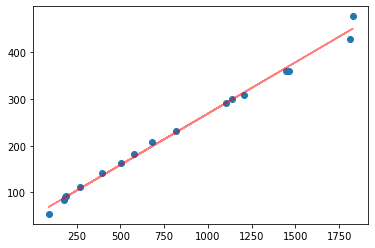

In [11]:
plt.scatter(airfare['Distance'], airfare['Fare'])
plt.plot(airfare['Distance'], lm_data_hw3_1.params[0] + lm_data_hw3_1.params[1] * airfare['Distance'], color='red', alpha=0.5)
plt.show()

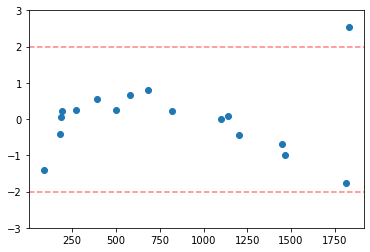

In [12]:
plt.scatter(airfare['Distance'], st_residuals_hw3_1)
plt.axhline(2, color='red', linestyle='--', alpha=0.5)
plt.axhline(-2, color='red', linestyle='--', alpha=0.5)
plt.ylim(-3,3)
plt.show()

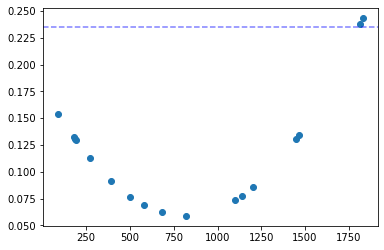

In [13]:
plt.scatter(airfare['Distance'], leverage_hw3_1)
plt.axhline(4/len(airfare), color='blue', linestyle='--', alpha=0.5)
plt.show()

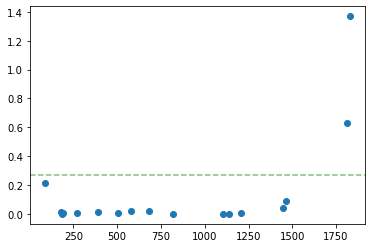

In [14]:
plt.scatter(airfare['Distance'], cooks_hw3_1[0])
plt.axhline(4/(len(airfare)-2), color='green', linestyle='--', alpha=0.5)
plt.show()

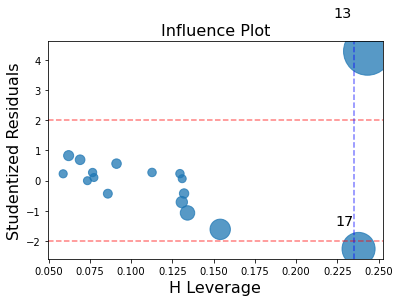

In [15]:
sm.graphics.influence_plot(lm_data_hw3_1)
plt.axhline(-2,0, color='red', linestyle='--', alpha=0.5)
plt.axhline(2,0, color='red', linestyle='--', alpha=0.5)
plt.axvline(4/(len(airfare)), color='blue', linestyle='--', alpha=0.5)
plt.show()


Thus, two values are bad leverage points, having the index 12 and 16.  
Moreover, they also have big Cook's distance, too.

In [16]:
airfare_improve = airfare.drop([13,17])

In [17]:
airfare_improve

,Fare,Distance
City,,
1,360,1463
2,360,1448
3,207,681
4,111,270
5,93,190
6,141,393
7,291,1102
8,183,578
9,309,1204


In [18]:
lm_data_improve_hw3_1 = smf.ols(formula='Fare~Distance', data=airfare_improve).fit()

In [19]:
lm_data_improve_hw3_1.summary()

/Users/user/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3553.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           3.08e-17
Time:                        12:34:53   Log-Likelihood:                -48.441
No. Observations:                  15   AIC:                             100.9
Df Residuals:                      13   BIC:                             102.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.4436      3.006     16.781      0.000      43.950      56.938
Distance       0.2167      0.004     59.609      0.000       0.209       0.225
==============================================================================
Omnibus:                        5.543   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                2.793
Skew:                          -0.980   Prob(JB):                        0.247
Kurtosis:                       3.790   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
s_improve_hw3_1 = (((lm_data_improve_hw3_1.resid - lm_data_improve_hw3_1.resid.mean())**2).sum() / (len(airfare_improve)-2))**(1/2)
s_improve_hw3_1

6.566890429672645

In [21]:
influence_improve_hw3_1 = lm_data_improve_hw3_1.get_influence()

In [22]:
leverage_improve_hw3_1 = influence_improve_hw3_1.hat_matrix_diag
leverage_improve_hw3_1

array([0.25333463, 0.24622714, 0.06666752, 0.1188712 , 0.14107402,
       0.09238877, 0.12057157, 0.07002502, 0.14998498, 0.13022439,
       0.14289741, 0.07667278, 0.14443376, 0.07228127, 0.17434553])

In [23]:
st_residuals_improve_hw3_1 = lm_data_improve_hw3_1.resid_pearson
st_residuals_improve_hw3_1

array([-1.14575491, -0.65069622,  1.36460657,  0.3104236 ,  0.20971329,
        0.81931456,  0.2614015 ,  1.1093118 , -0.36397427,  0.44377231,
       -0.04910045,  0.41974862, -0.79775534,  0.49776829, -2.42877933])

In [24]:
cooks_improve_hw3_1 = influence_improve_hw3_1.cooks_distance
cooks_improve_hw3_1[0]

array([2.98260682e-01, 9.17448061e-02, 7.12568213e-02, 7.37695868e-03,
       4.20491740e-03, 3.76435716e-02, 5.32635434e-03, 4.98181939e-02,
       1.37501029e-02, 1.69499453e-02, 2.34476744e-04, 7.92279649e-03,
       6.27871691e-02, 1.04044128e-02, 7.54328090e-01])

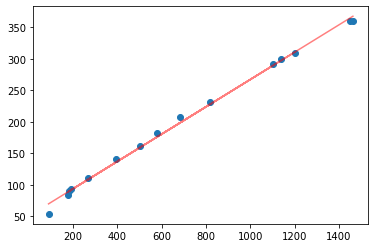

In [25]:
plt.scatter(airfare_improve['Distance'], airfare_improve['Fare'])
plt.plot(airfare_improve['Distance'], lm_data_improve_hw3_1.params[0] + lm_data_improve_hw3_1.params[1] * airfare_improve['Distance'], color='red', alpha=0.5)
plt.show()

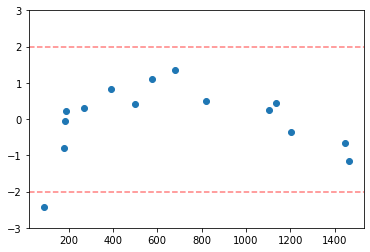

In [26]:
plt.scatter(airfare_improve['Distance'], st_residuals_improve_hw3_1)
plt.axhline(2, color='red', linestyle='--', alpha=0.5)
plt.axhline(-2, color='red', linestyle='--', alpha=0.5)
plt.ylim(-3,3)
plt.show()

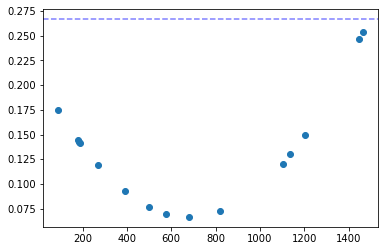

In [27]:
plt.scatter(airfare_improve['Distance'], leverage_improve_hw3_1)
plt.axhline(4/len(airfare_improve), color='blue', linestyle='--', alpha=0.5)
plt.show()

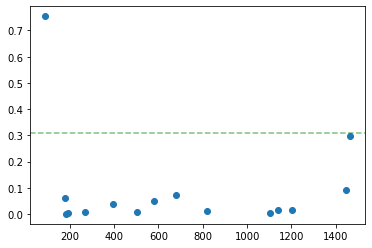

In [28]:
plt.scatter(airfare_improve['Distance'], cooks_improve_hw3_1[0])
plt.axhline(4/(len(airfare_improve)-2), color='green', linestyle='--', alpha=0.5)
plt.show()

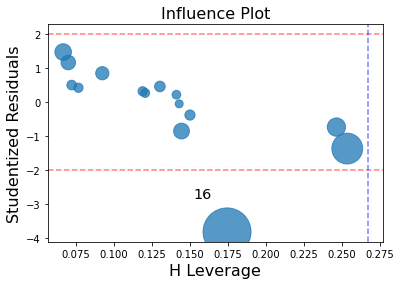

In [29]:
sm.graphics.influence_plot(lm_data_improve_hw3_1)
plt.axhline(-2,0, color='red', linestyle='--', alpha=0.5)
plt.axhline(2,0, color='red', linestyle='--', alpha=0.5)
plt.axvline(4/(len(airfare_improve)), color='blue', linestyle='--', alpha=0.5)
plt.show()


## 2.

In [30]:
cars = pd.read_csv("/Users/user/Desktop/Yonsei/Junior/3-2/Introduction to Data Analysis and Regression/Homework/cars04.csv", header=0)

In [31]:
cars

,Vehicle Name,Hybrid,SuggestedRetailPrice,DealerCost,EngineSize,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,WheelBase,Length,Width
0,Chevrolet Aveo 4dr,0,11690,10965,1.6,4,103,28,34,2370,98,167,66
1,Chevrolet Aveo LS 4dr hatch,0,12585,11802,1.6,4,103,28,34,2348,98,153,66
2,Chevrolet Cavalier 2dr,0,14610,13697,2.2,4,140,26,37,2617,104,183,69
3,Chevrolet Cavalier 4dr,0,14810,13884,2.2,4,140,26,37,2676,104,183,68
4,Chevrolet Cavalier LS 2dr,0,16385,15357,2.2,4,140,26,37,2617,104,183,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Saab 9-3 Arc convertible 2dr,0,40670,38520,2.0,4,210,21,29,3480,105,182,69
230,Saab 9-3 Aero convertible 2dr,0,43175,40883,2.0,4,210,21,30,3700,105,182,69
231,Volvo C70 LPT convertible 2dr,0,40565,38203,2.4,5,197,21,28,3450,105,186,72
232,Volvo C70 HPT convertible 2dr,0,42565,40083,2.3,5,242,20,26,3450,105,186,72


In [32]:
lm_data_hw3_2 = smf.ols(formula='SuggestedRetailPrice~DealerCost', data=cars).fit()

In [33]:
lm_data_hw3_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     SuggestedRetailPrice   R-squared:                       0.999
Model:                              OLS   Adj. R-squared:                  0.999
Method:                   Least Squares   F-statistic:                 1.704e+05
Date:                  Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                          12:34:54   Log-Likelihood:                -1822.8
No. Observations:                   234   AIC:                             3650.
Df Residuals:                       232   BIC:                             3657.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -61.9042     81.801     -0.757      0.450    -223.073      99.264
DealerCost     1.0888      0.003    412.768      0.000       1.084       1.094
==============================================================================
Omnibus:                       41.776   Durbin-Watson:                   0.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.412
Skew:                           0.648   Prob(JB):                     2.42e-35
Kurtosis:                       6.830   Cond. No.                     6.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
s_hw3_2 = (((lm_data_hw3_2.resid - lm_data_hw3_2.resid.mean())**2).sum() / (len(cars)-2))**(1/2)

In [35]:
influence_hw3_2 = lm_data_hw3_2.get_influence()

In [36]:
leverage_hw3_2 = influence_hw3_2.hat_matrix_diag
leverage_hw3_2

array([0.00971819, 0.00917729, 0.00805719, 0.00795452, 0.00719516,
       0.0085405 , 0.0078452 , 0.00875867, 0.0085071 , 0.00762838,
       0.00757085, 0.00894535, 0.00845464, 0.00761019, 0.01030204,
       0.00961852, 0.00955759, 0.00858051, 0.00778051, 0.00778051,
       0.00741633, 0.01046501, 0.00989198, 0.00928613, 0.00855166,
       0.00800595, 0.00715642, 0.00892694, 0.0080296 , 0.00769166,
       0.01015501, 0.00822711, 0.00746641, 0.00794362, 0.0072234 ,
       0.00884454, 0.00861716, 0.00772221, 0.00898166, 0.00718496,
       0.00841463, 0.00808322, 0.00795179, 0.01027625, 0.00976405,
       0.0099345 , 0.00527278, 0.00534683, 0.00627331, 0.00581834,
       0.00536725, 0.00648564, 0.00521071, 0.00612698, 0.00529191,
       0.00523034, 0.00624208, 0.00575472, 0.00609884, 0.00573404,
       0.0051342 , 0.00608122, 0.00535125, 0.00677072, 0.00611   ,
       0.00588546, 0.00608619, 0.00621744, 0.00591118, 0.0065149 ,
       0.00612234, 0.00542079, 0.00600075, 0.00604095, 0.00669

In [37]:
st_residuals_hw3_2 = lm_data_hw3_2.resid_pearson

In [38]:
cooks_hw3_2 = influence_hw3_2.cooks_distance
cooks_hw3_2[0]

array([5.04092483e-04, 5.62242114e-04, 6.95539346e-04, 7.07192479e-04,
       7.97669064e-04, 8.43123201e-04, 6.41389668e-04, 8.67687784e-04,
       8.53227053e-04, 7.71128516e-04, 7.70265216e-04, 7.48471349e-05,
       8.25128883e-05, 9.07139260e-05, 2.49087745e-03, 5.84335866e-04,
       5.87817414e-04, 3.07342993e-06, 3.82539837e-06, 3.82539837e-06,
       1.92384614e-04, 2.61179934e-03, 2.82336903e-03, 7.99404770e-04,
       1.35741444e-03, 1.23317631e-03, 6.71363845e-04, 3.13263057e-03,
       3.27817145e-04, 1.02695760e-04, 4.81018622e-04, 5.92437529e-04,
       6.33012287e-04, 6.05284741e-04, 6.44963410e-04, 2.18938632e-03,
       1.03743694e-02, 1.20028960e-02, 9.84782270e-03, 1.31319561e-02,
       7.71182746e-05, 6.26289809e-04, 6.41828937e-04, 7.58984244e-04,
       8.46878806e-04, 8.15843097e-04, 5.31264610e-05, 5.22593976e-05,
       5.05333217e-05, 1.60281349e-04, 5.26283404e-05, 1.34207076e-03,
       8.77071382e-04, 4.96649324e-04, 2.63161560e-04, 3.93498259e-04,
      

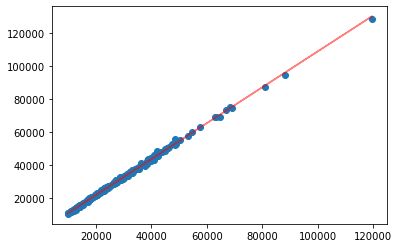

In [39]:
plt.scatter(cars['DealerCost'], cars['SuggestedRetailPrice'])
plt.plot(cars['DealerCost'], lm_data_hw3_2.params[0] + lm_data_hw3_2.params[1] * cars['DealerCost'], color='red', alpha=0.5)
plt.show()

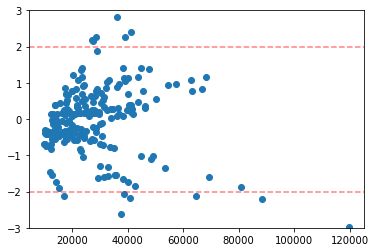

In [40]:
plt.scatter(cars['DealerCost'], st_residuals_hw3_2)
plt.axhline(2, color='red', linestyle='--', alpha=0.5)
plt.axhline(-2, color='red', linestyle='--', alpha=0.5)
plt.ylim(-3,3)
plt.show()

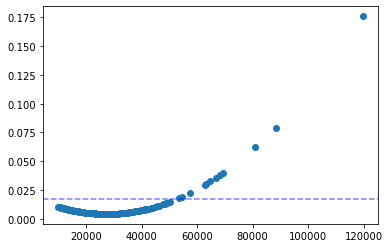

In [41]:
plt.scatter(cars['DealerCost'], leverage_hw3_2)
plt.axhline(4/len(cars), color='blue', linestyle='--', alpha=0.5)
plt.show()

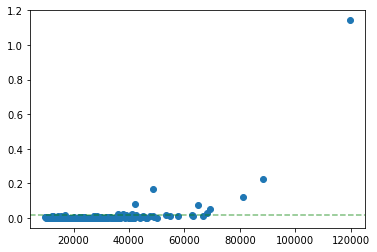

In [42]:
plt.scatter(cars['DealerCost'], cooks_hw3_2[0])
plt.axhline(4/(len(cars)-2), color='green', linestyle='--', alpha=0.5)
plt.show()

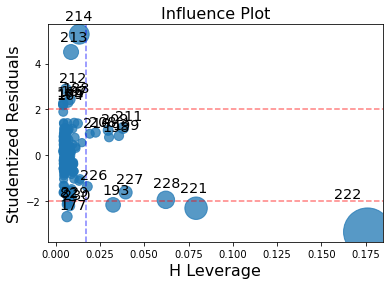

In [43]:
sm.graphics.influence_plot(lm_data_hw3_2)
plt.axhline(-2,0, color='red', linestyle='--', alpha=0.5)
plt.axhline(2,0, color='red', linestyle='--', alpha=0.5)
plt.axvline(4/(len(cars)), color='blue', linestyle='--', alpha=0.5)
plt.show()


In [44]:
cars[leverage_hw3_2 > 4/(len(cars))].index

Int64Index([193, 198, 199, 208, 209, 210, 211, 221, 222, 226, 227, 228], dtype='int64')

In [45]:
cars[((st_residuals_hw3_2)**2)**(1/2) > 2].index

Int64Index([82, 164, 165, 177, 179, 187, 188, 193, 212, 213, 214, 221, 222,
            229, 230],
           dtype='int64')

In [46]:
cars_index = cars[leverage_hw3_2 > 4/(len(cars))].index | cars[((st_residuals_hw3_2)**2)**(1/2) > 2].index
cars_index

/var/folders/j8/fdggt_y92px801gyxlv1h1r00000gn/T/ipykernel_37637/3349881932.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  cars_index = cars[leverage_hw3_2 > 4/(len(cars))].index | cars[((st_residuals_hw3_2)**2)**(1/2) > 2].index


Int64Index([ 82, 164, 165, 177, 179, 187, 188, 193, 198, 199, 208, 209, 210,
            211, 212, 213, 214, 221, 222, 226, 227, 228, 229, 230],
           dtype='int64')

In [47]:
cars_improve = cars.drop(cars_index)

In [48]:
cars_improve

,Vehicle Name,Hybrid,SuggestedRetailPrice,DealerCost,EngineSize,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,WheelBase,Length,Width
0,Chevrolet Aveo 4dr,0,11690,10965,1.6,4,103,28,34,2370,98,167,66
1,Chevrolet Aveo LS 4dr hatch,0,12585,11802,1.6,4,103,28,34,2348,98,153,66
2,Chevrolet Cavalier 2dr,0,14610,13697,2.2,4,140,26,37,2617,104,183,69
3,Chevrolet Cavalier 4dr,0,14810,13884,2.2,4,140,26,37,2676,104,183,68
4,Chevrolet Cavalier LS 2dr,0,16385,15357,2.2,4,140,26,37,2617,104,183,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,Mercedes-Benz CLK500 coupe 2dr (convertible),0,52800,49104,5.0,8,302,17,22,3585,107,183,69
225,Mercedes-Benz E320 4dr,0,48170,44849,3.2,6,221,19,27,3635,112,190,71
231,Volvo C70 LPT convertible 2dr,0,40565,38203,2.4,5,197,21,28,3450,105,186,72
232,Volvo C70 HPT convertible 2dr,0,42565,40083,2.3,5,242,20,26,3450,105,186,72


In [49]:
lm_data_improve_hw3_2 = smf.ols(formula='SuggestedRetailPrice~DealerCost', data=cars_improve).fit()

In [50]:
lm_data_improve_hw3_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     SuggestedRetailPrice   R-squared:                       0.999
Model:                              OLS   Adj. R-squared:                  0.999
Method:                   Least Squares   F-statistic:                 1.445e+05
Date:                  Mon, 30 Jan 2023   Prob (F-statistic):          1.39e-297
Time:                          12:34:55   Log-Likelihood:                -1558.3
No. Observations:                   210   AIC:                             3121.
Df Residuals:                       208   BIC:                             3127.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -276.7083     75.905     -3.645      0.000    -426.349    -127.067
DealerCost     1.0967      0.003    380.083      0.000       1.091       1.102
==============================================================================
Omnibus:                       14.923   Durbin-Watson:                   0.728
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.679
Skew:                          -0.578   Prob(JB):                     0.000239
Kurtosis:                       3.755   Cond. No.                     7.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
s_improve_hw3_2 = (((lm_data_improve_hw3_2.resid - lm_data_improve_hw3_2.resid.mean())**2).sum() / (len(cars_improve)-2))**(1/2)

In [52]:
influence_improve_hw3_2 = lm_data_improve_hw3_2.get_influence()

In [53]:
leverage_improve_hw3_2 = influence_improve_hw3_2.hat_matrix_diag
leverage_improve_hw3_2

array([0.01394486, 0.01284018, 0.01060061, 0.01039928, 0.00893685,
       0.01155796, 0.01018576, 0.0119948 , 0.01149133, 0.00976506,
       0.00965408, 0.01237068, 0.0113868 , 0.00972993, 0.01515072,
       0.01374034, 0.01361552, 0.01163787, 0.01005984, 0.01005984,
       0.00935748, 0.01548956, 0.01430242, 0.01306141, 0.01158024,
       0.01050004, 0.0088637 , 0.01233353, 0.01054644, 0.00988745,
       0.01484586, 0.01093546, 0.00945337, 0.01037795, 0.00899029,
       0.01216748, 0.01171114, 0.00994664, 0.01244401, 0.00891759,
       0.01130721, 0.01065177, 0.01039394, 0.01509719, 0.01403909,
       0.01439009, 0.00560997, 0.00571924, 0.00724719, 0.00646666,
       0.00574983, 0.00762552, 0.00552056, 0.00699125, 0.00563793,
       0.00554862, 0.00719222, 0.00636152, 0.00694253, 0.00632759,
       0.00541345, 0.0069121 , 0.00572585, 0.00814457, 0.00696182,
       0.00657878, 0.00692068, 0.00714897, 0.00662205, 0.00767824,
       0.0069832 , 0.00583096, 0.006774  , 0.0068428 , 0.00799

In [54]:
st_residuals_improve_hw3_2 = lm_data_improve_hw3_2.resid_pearson

In [55]:
cooks_improve_hw3_2 = influence_improve_hw3_2.cooks_distance
cooks_improve_hw3_2[0]

array([1.49769163e-04, 2.66241683e-04, 5.97543292e-04, 6.30962784e-04,
       8.98271792e-04, 7.53084378e-04, 5.45273609e-04, 7.55567968e-04,
       7.74832640e-04, 7.84405479e-04, 7.92096373e-04, 1.45251441e-03,
       1.32890220e-03, 1.09189831e-03, 3.42095796e-03, 2.42802949e-04,
       2.53446100e-04, 3.52095572e-04, 2.23939593e-04, 2.23939593e-04,
       3.57952729e-05, 3.61978117e-03, 4.25046232e-03, 5.66201580e-04,
       1.64704577e-03, 1.52992962e-03, 3.27383918e-03, 5.21039625e-03,
       1.16501998e-04, 1.31580172e-06, 9.48045186e-05, 4.21378289e-04,
       5.86025051e-04, 4.77584794e-04, 6.39837356e-04, 3.21707097e-03,
       2.26010426e-02, 2.63271302e-02, 2.13079765e-02, 2.86760234e-02,
       3.87751501e-05, 3.74153811e-03, 3.71192695e-03, 3.67905134e-04,
       5.59377107e-04, 4.90104177e-04, 3.26038918e-04, 3.36128747e-04,
       5.13536952e-04, 8.36761324e-04, 3.41240460e-04, 2.02274002e-03,
       1.38329179e-03, 5.51552059e-04, 2.87281141e-04, 5.09128332e-04,
      

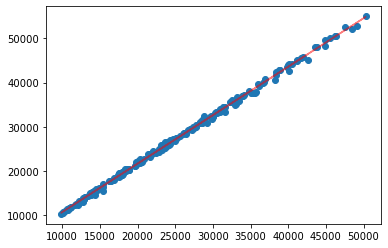

In [56]:
plt.scatter(cars_improve['DealerCost'], cars_improve['SuggestedRetailPrice'])
plt.plot(cars_improve['DealerCost'], lm_data_improve_hw3_2.params[0] + lm_data_improve_hw3_2.params[1] * cars_improve['DealerCost'], color='red', alpha=0.5)
plt.show()

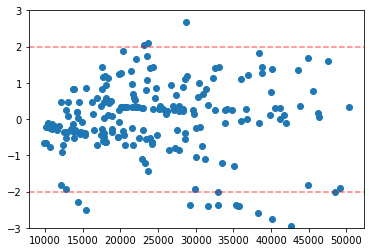

In [57]:
plt.scatter(cars_improve['DealerCost'], st_residuals_improve_hw3_2)
plt.axhline(2, color='red', linestyle='--', alpha=0.5)
plt.axhline(-2, color='red', linestyle='--', alpha=0.5)
plt.ylim(-3,3)
plt.show()

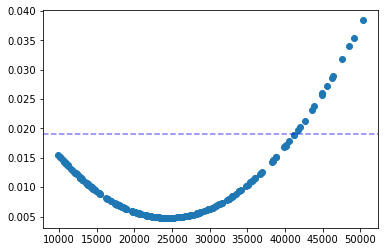

In [58]:
plt.scatter(cars_improve['DealerCost'], leverage_improve_hw3_2)
plt.axhline(4/len(cars_improve), color='blue', linestyle='--', alpha=0.5)
plt.show()

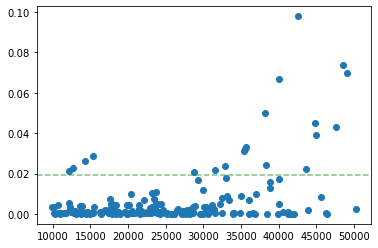

In [59]:
plt.scatter(cars_improve['DealerCost'], cooks_improve_hw3_2[0])
plt.axhline(4/(len(cars_improve)-2), color='green', linestyle='--', alpha=0.5)
plt.show()

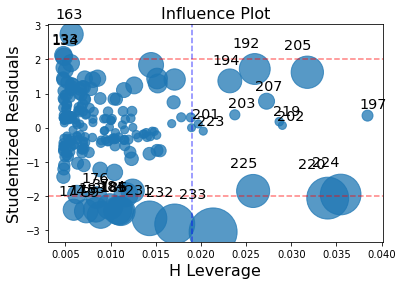

In [60]:
sm.graphics.influence_plot(lm_data_improve_hw3_2)
plt.axhline(-2,0, color='red', linestyle='--', alpha=0.5)
plt.axhline(2,0, color='red', linestyle='--', alpha=0.5)
plt.axvline(4/(len(cars_improve)), color='blue', linestyle='--', alpha=0.5)
plt.show()


In [61]:
cars_log = np.log(cars[['SuggestedRetailPrice', 'DealerCost']])

In [62]:
cars_log

,SuggestedRetailPrice,DealerCost
0,9.366489,9.302464
1,9.440261,9.376024
2,9.589462,9.524932
3,9.603058,9.538492
4,9.704122,9.639327
...,...,...
229,10.613246,10.558933
230,10.673017,10.618470
231,10.610661,10.550669
232,10.658788,10.598708


In [63]:
lm_data_log_hw3_2 = smf.ols(formula='SuggestedRetailPrice~DealerCost', data=cars_log).fit()

In [64]:
lm_data_log_hw3_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     SuggestedRetailPrice   R-squared:                       0.998
Model:                              OLS   Adj. R-squared:                  0.998
Method:                   Least Squares   F-statistic:                 1.505e+05
Date:                  Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                          12:34:56   Log-Likelihood:                 600.70
No. Observations:                   234   AIC:                            -1197.
Df Residuals:                       232   BIC:                            -1190.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0695      0.026     -2.625      0.009      -0.122      -0.017
DealerCost     1.0148      0.003    387.942      0.000       1.010       1.020
==============================================================================
Omnibus:                       16.038   Durbin-Watson:                   0.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.059
Skew:                          -0.423   Prob(JB):                     3.62e-06
Kurtosis:                       4.362   Cond. No.                         222.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
s_log_hw3_2 = (((lm_data_log_hw3_2.resid - lm_data_log_hw3_2.resid.mean())**2).sum() / (len(cars_log)-2))**(1/2)

In [66]:
influence_log_hw3_2 = lm_data_log_hw3_2.get_influence()

In [67]:
leverage_log_hw3_2 = influence_log_hw3_2.hat_matrix_diag
leverage_log_hw3_2

array([0.0169048 , 0.01469235, 0.01086525, 0.01056007, 0.00851759,
       0.01240099, 0.01024295, 0.01315027, 0.01228945, 0.00963737,
       0.00948182, 0.01382056, 0.01211589, 0.00958795, 0.01960391,
       0.01647733, 0.01622054, 0.01253572, 0.01005903, 0.01005903,
       0.00907451, 0.02042098, 0.01767261, 0.01511691, 0.01243846,
       0.01071206, 0.00842318, 0.01375323, 0.01078254, 0.00981094,
       0.01889147, 0.01138628, 0.00920486, 0.0105281 , 0.00858701,
       0.0134552 , 0.01266017, 0.00989565, 0.01395415, 0.00849266,
       0.01198491, 0.01094376, 0.01055206, 0.01947727, 0.01710458,
       0.01786494, 0.00493195, 0.00502621, 0.00651617, 0.00571628,
       0.00505292, 0.00693214, 0.00485618, 0.00624519, 0.0049559 ,
       0.00487982, 0.00645727, 0.00561461, 0.00619456, 0.00558212,
       0.00476705, 0.0061631 , 0.00503197, 0.00753283, 0.00621457,
       0.0058263 , 0.00617196, 0.00641119, 0.00586921, 0.00699157,
       0.00623681, 0.0051244 , 0.00602181, 0.00609189, 0.00735

In [68]:
st_residuals_log_hw3_2 = lm_data_log_hw3_2.resid_pearson

In [69]:
cooks_log_hw3_2 = influence_log_hw3_2.cooks_distance
cooks_log_hw3_2[0]

array([5.14591757e-04, 6.35290202e-04, 8.55378217e-04, 8.68721179e-04,
       9.53915783e-04, 1.46838124e-03, 6.81391000e-04, 1.66181588e-03,
       1.49156599e-03, 9.74704864e-04, 9.60815879e-04, 5.23973583e-03,
       4.23896974e-03, 2.81547978e-03, 1.90388859e-02, 8.06323009e-04,
       8.05534884e-04, 1.40070844e-03, 8.35314080e-04, 8.35314080e-04,
       4.15985580e-08, 2.19698670e-02, 1.92104282e-02, 1.63568491e-03,
       3.62746313e-03, 2.58524611e-03, 6.37873502e-03, 1.50755294e-02,
       7.39011772e-05, 8.69827087e-05, 4.96429963e-04, 6.00735079e-04,
       6.21200084e-04, 6.03591697e-04, 6.24191797e-04, 8.67410977e-03,
       6.24836660e-02, 5.18855922e-02, 6.81466362e-02, 4.66313052e-02,
       2.85659835e-04, 9.65718506e-03, 9.20015567e-03, 2.07493428e-03,
       2.20117727e-03, 2.15464658e-03, 4.97406290e-04, 5.24489149e-04,
       1.01117172e-03, 1.27473626e-03, 5.34804818e-04, 1.94717238e-03,
       8.25423656e-04, 3.33370440e-04, 1.01969258e-04, 2.32085395e-04,
      

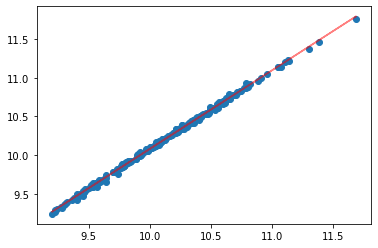

In [70]:
plt.scatter(cars_log['DealerCost'], cars_log['SuggestedRetailPrice'])
plt.plot(cars_log['DealerCost'], lm_data_log_hw3_2.params[0] + lm_data_log_hw3_2.params[1] * cars_log['DealerCost'], color='red', alpha=0.5)
plt.show()

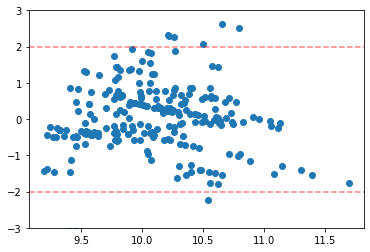

In [71]:
plt.scatter(cars_log['DealerCost'], st_residuals_log_hw3_2)
plt.axhline(2, color='red', linestyle='--', alpha=0.5)
plt.axhline(-2, color='red', linestyle='--', alpha=0.5)
plt.ylim(-3,3)
plt.show()

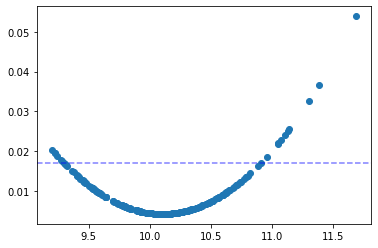

In [72]:
plt.scatter(cars_log['DealerCost'], leverage_log_hw3_2)
plt.axhline(4/len(cars_log), color='blue', linestyle='--', alpha=0.5)
plt.show()

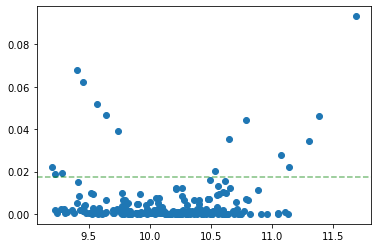

In [73]:
plt.scatter(cars_log['DealerCost'], cooks_log_hw3_2[0])
plt.axhline(4/(len(cars_log)-2), color='green', linestyle='--', alpha=0.5)
plt.show()

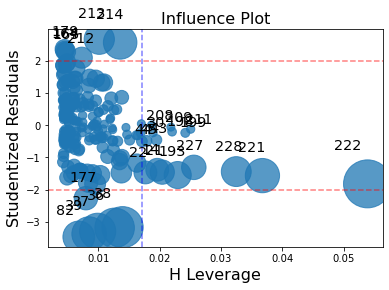

In [74]:
sm.graphics.influence_plot(lm_data_log_hw3_2)
plt.axhline(-2,0, color='red', linestyle='--', alpha=0.5)
plt.axhline(2,0, color='red', linestyle='--', alpha=0.5)
plt.axvline(4/(len(cars_log)), color='blue', linestyle='--', alpha=0.5)
plt.show()


Thus, there are no bad leverage points.

In [75]:
cars_log_index = cars_log[cooks_log_hw3_2[0] > 4/len(cars_log)].index

In [76]:
cars_log_improve = cars_log.drop(cars_log_index)

In [77]:
cars_log_improve

,SuggestedRetailPrice,DealerCost
0,9.366489,9.302464
1,9.440261,9.376024
2,9.589462,9.524932
3,9.603058,9.538492
4,9.704122,9.639327
...,...,...
229,10.613246,10.558933
230,10.673017,10.618470
231,10.610661,10.550669
232,10.658788,10.598708


In [78]:
lm_data_log_improve_hw3_2 = smf.ols(formula='SuggestedRetailPrice~DealerCost', data=cars_log_improve).fit()

In [79]:
lm_data_log_improve_hw3_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     SuggestedRetailPrice   R-squared:                       0.999
Model:                              OLS   Adj. R-squared:                  0.999
Method:                   Least Squares   F-statistic:                 1.729e+05
Date:                  Mon, 30 Jan 2023   Prob (F-statistic):          1.34e-315
Time:                          12:34:57   Log-Likelihood:                 605.95
No. Observations:                   218   AIC:                            -1208.
Df Residuals:                       216   BIC:                            -1201.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0429      0.025     -1.745      0.082      -0.091       0.006
DealerCost     1.0124      0.002    415.766      0.000       1.008       1.017
==============================================================================
Omnibus:                        2.367   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.306   Jarque-Bera (JB):                2.044
Skew:                           0.225   Prob(JB):                        0.360
Kurtosis:                       3.149   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
s_log_improve_hw3_2 = (((lm_data_log_improve_hw3_2.resid - lm_data_log_improve_hw3_2.resid.mean())**2).sum() / (len(cars_log_improve)-2))**(1/2)

In [81]:
influence_log_improve_hw3_2 = lm_data_log_improve_hw3_2.get_influence()

In [82]:
leverage_log_improve_hw3_2 = influence_log_improve_hw3_2.hat_matrix_diag
leverage_log_improve_hw3_2

array([0.02085537, 0.0179677 , 0.01298518, 0.01258884, 0.00994212,
       0.01498216, 0.0121772 , 0.01595775, 0.01483699, 0.01139177,
       0.01119017, 0.01683108, 0.01461115, 0.01132771, 0.02029713,
       0.01996185, 0.01515753, 0.01193856, 0.01193856, 0.01066261,
       0.0185215 , 0.01503092, 0.0127862 , 0.00982009, 0.01674334,
       0.01287774, 0.0116168 , 0.02345144, 0.01366225, 0.01083139,
       0.01254733, 0.01003187, 0.01635499, 0.01444074, 0.01308717,
       0.01257845, 0.02421739, 0.02111631, 0.0221097 , 0.00535635,
       0.00547385, 0.00736487, 0.0063442 , 0.00550722, 0.00789842,
       0.00526228, 0.00701818, 0.00538616, 0.00529159, 0.00728944,
       0.00621518, 0.0069535 , 0.00617399, 0.00515219, 0.00691332,
       0.00548105, 0.00867115, 0.00697906, 0.00648404, 0.00692463,
       0.00723046, 0.00653863, 0.00797476, 0.00700747, 0.00559672,
       0.00673303, 0.00682242, 0.00844849, 0.00716676, 0.00525335,
       0.00527376, 0.00854073, 0.00562118, 0.00652393, 0.00629

In [83]:
st_residuals_log_improve_hw3_2 = lm_data_log_improve_hw3_2.resid_pearson

In [84]:
cooks_log_improve_hw3_2 = influence_log_improve_hw3_2.cooks_distance
cooks_log_improve_hw3_2[0]

array([3.50764003e-03, 3.51683147e-03, 3.43168339e-03, 3.40597853e-03,
       3.19823237e-03, 5.40576518e-03, 2.83600083e-03, 6.10253040e-03,
       5.43840600e-03, 3.49066188e-03, 3.42211271e-03, 5.71911686e-03,
       4.58844992e-03, 2.96674902e-03, 4.41520562e-03, 4.36049930e-03,
       8.70190906e-04, 4.53434816e-04, 4.53434816e-04, 2.69480847e-04,
       6.54309615e-03, 1.07002233e-02, 7.66534741e-03, 8.40586018e-03,
       3.66112744e-02, 9.28887325e-04, 2.25320628e-05, 3.79826355e-03,
       2.81313702e-03, 2.48331791e-03, 2.66978864e-03, 2.38018114e-03,
       2.25659757e-02, 5.34168230e-06, 1.30106573e-02, 1.23787643e-02,
       8.97380063e-03, 8.63973175e-03, 8.73286005e-03, 3.98508941e-04,
       4.23243864e-04, 8.99620267e-04, 1.30779755e-03, 4.33358662e-04,
       5.02139141e-03, 2.08010213e-03, 1.24606615e-03, 4.77786435e-04,
       8.00419481e-04, 6.59892641e-04, 7.99045130e-04, 1.77837440e-03,
       4.76643399e-04, 3.63571233e-04, 8.77457801e-03, 6.41767224e-03,
      

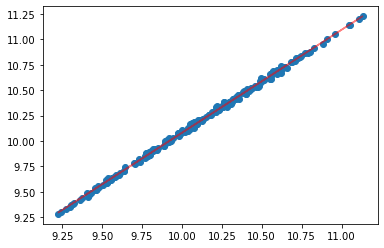

In [85]:
plt.scatter(cars_log_improve['DealerCost'], cars_log_improve['SuggestedRetailPrice'])
plt.plot(cars_log_improve['DealerCost'], lm_data_log_improve_hw3_2.params[0] + lm_data_log_improve_hw3_2.params[1] * cars_log_improve['DealerCost'], color='red', alpha=0.5)
plt.show()

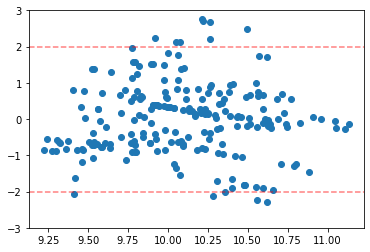

In [86]:
plt.scatter(cars_log_improve['DealerCost'], st_residuals_log_improve_hw3_2)
plt.axhline(2, color='red', linestyle='--', alpha=0.5)
plt.axhline(-2, color='red', linestyle='--', alpha=0.5)
plt.ylim(-3,3)
plt.show()

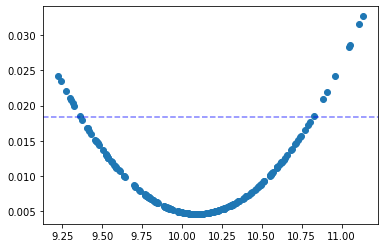

In [87]:
plt.scatter(cars_log_improve['DealerCost'], leverage_log_improve_hw3_2)
plt.axhline(4/len(cars_log_improve), color='blue', linestyle='--', alpha=0.5)
plt.show()

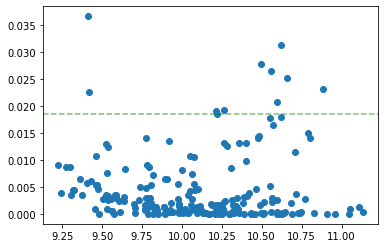

In [88]:
plt.scatter(cars_log_improve['DealerCost'], cooks_log_improve_hw3_2[0])
plt.axhline(4/(len(cars_log_improve)-2), color='green', linestyle='--', alpha=0.5)
plt.show()

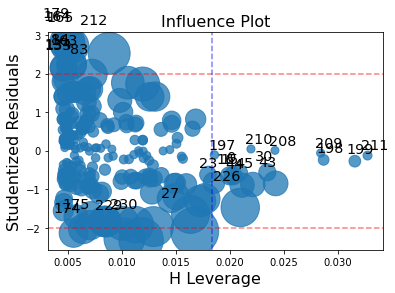

In [92]:
sm.graphics.influence_plot(lm_data_log_improve_hw3_2)
plt.axhline(-2,0, color='red', linestyle='--', alpha=0.5)
plt.axhline(2,0, color='red', linestyle='--', alpha=0.5)
plt.axvline(4/(len(cars_log_improve)), color='blue', linestyle='--', alpha=0.5)
plt.show()


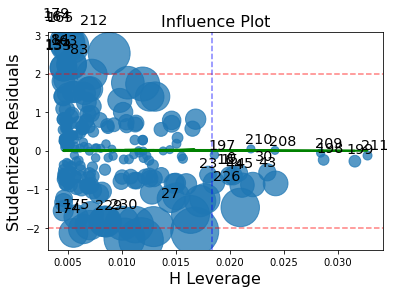

In [94]:
sm.graphics.influence_plot(lm_data_log_improve_hw3_2)
plt.plot(leverage_log_improve_hw3_2, cooks_log_improve_hw3_2[0], color='green')
plt.axhline(-2,0, color='red', linestyle='--', alpha=0.5)
plt.axhline(2,0, color='red', linestyle='--', alpha=0.5)
plt.axvline(4/(len(cars_log_improve)), color='blue', linestyle='--', alpha=0.5)
plt.show()


### 3.